In [286]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
%matplotlib inline

In [287]:
#Imported data
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [288]:
#checked for empty cells
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [289]:
df.shape

(145460, 23)

In [290]:
#check dtypes for data cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [291]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [292]:
#converted Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [293]:
#filled select columns with their mean
cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
def fillna_mean(cols):
    for col in cols:
        mean = df[col].mean()
        df[col] = df[col].fillna(value = mean)
    return df
        

In [294]:
df = fillna_mean(cols)

In [295]:
#changed dtype in RainToday and RainTomorrow columns
df['RainToday'] = df['RainToday'].replace({'Yes': 1, 'No': 0})
df['RainTomorrow'] = df['RainTomorrow'].replace({'Yes': 1, 'No': 0})

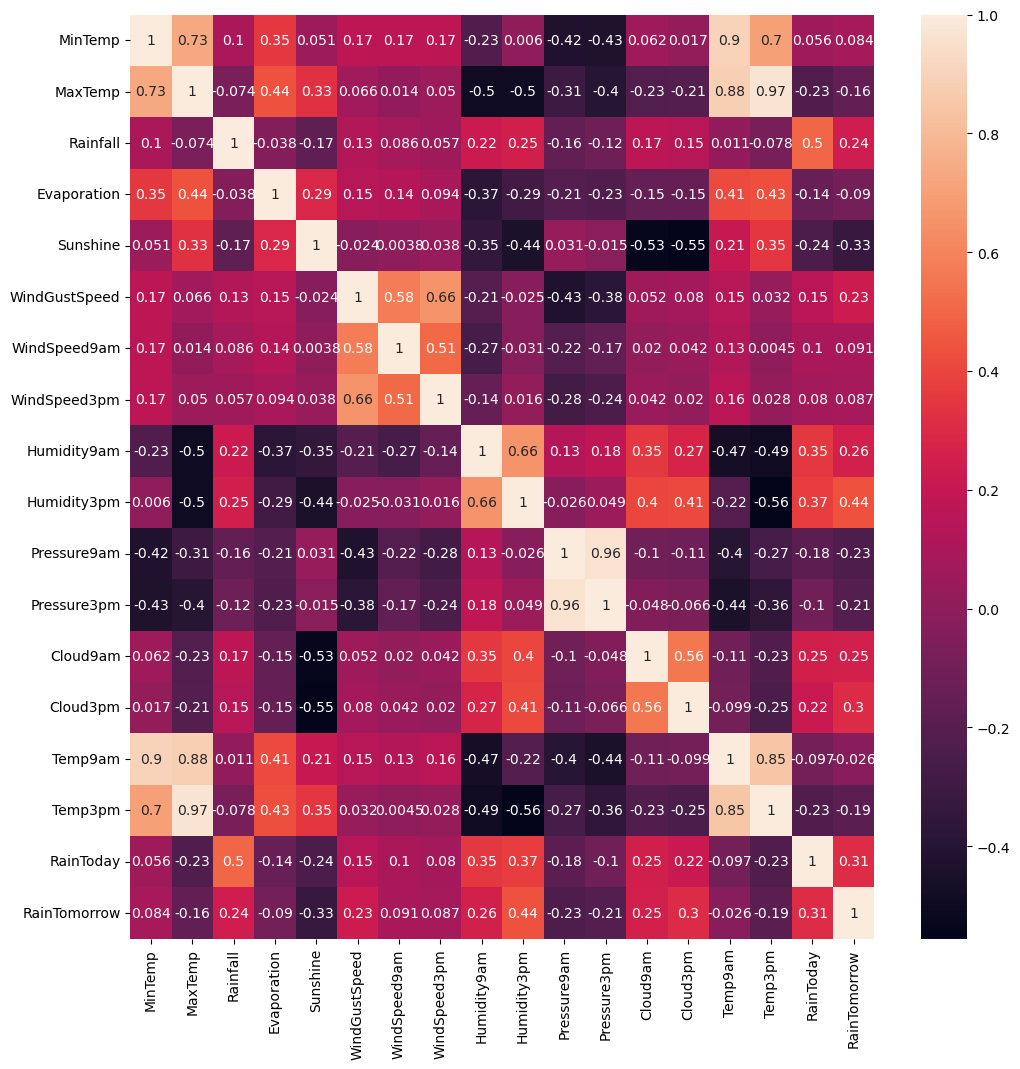

In [296]:
#explored relationships between varibles
df_corr = df.corr()
plt.figure(figsize = (12, 12))
sns.heatmap(df_corr, annot = True)
plt.show()

In [297]:
#filled categorical variables with the most common data 
cat_cols = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
def fillna_mode(cols):
    for col in cols:
        mode = df[col].mode()[0]
        df[col] = df[col].fillna(value = mode)
    return df

df = fillna_mode(cat_cols)

In [298]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0.0,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0.0,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0.0,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0.0,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0.0,0.0


In [299]:
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

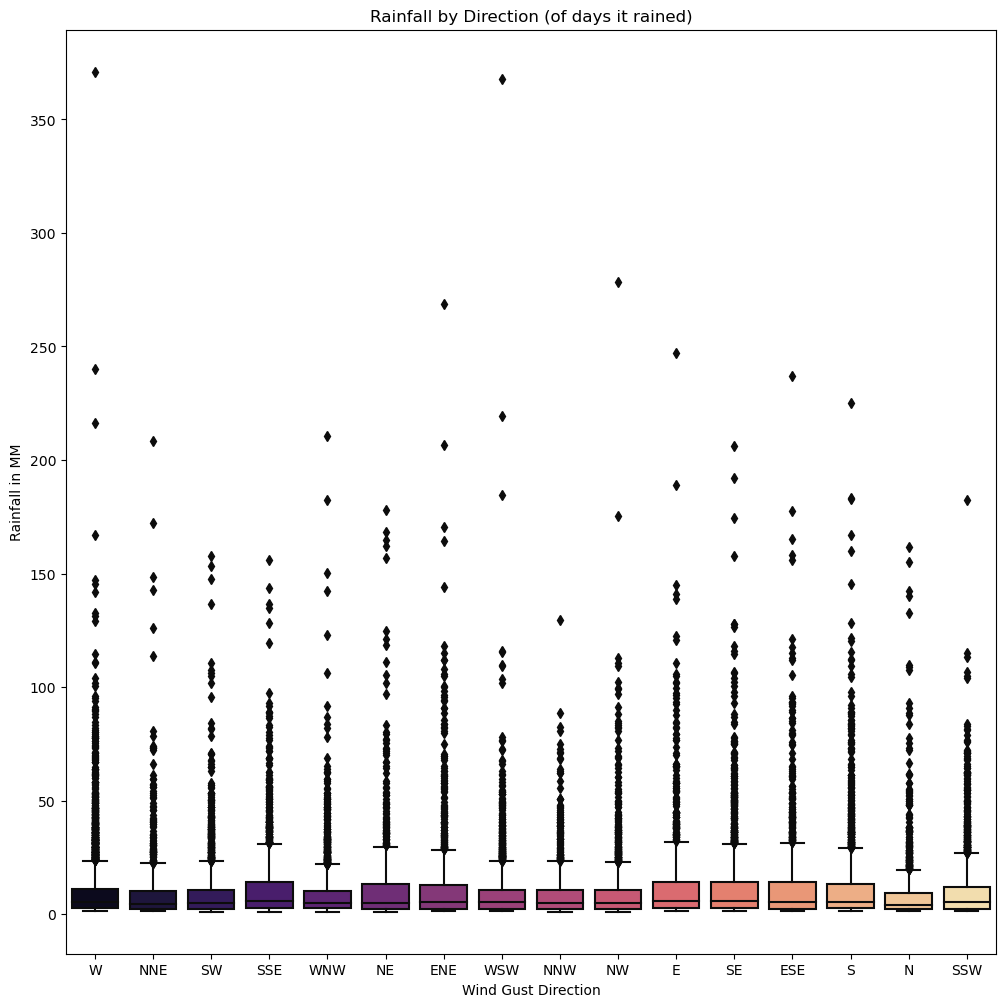

In [300]:
#visualized the rainfall by direction given that it rained that day
#It would appear that there is a greater amount of rainfall when the wind direction is slightly southeast
#the 75th percentile is slighly higher for directions that include "E" in the name as appose to "W"
plt.figure(figsize = (12, 12))
sns.boxplot(data = df[df['RainToday'] == 1.0], x = 'WindGustDir', y = 'Rainfall', palette = 'magma')
plt.title('Rainfall by Direction (of days it rained)')
plt.ylabel('Rainfall in MM')
plt.xlabel('Wind Gust Direction')
plt.show()

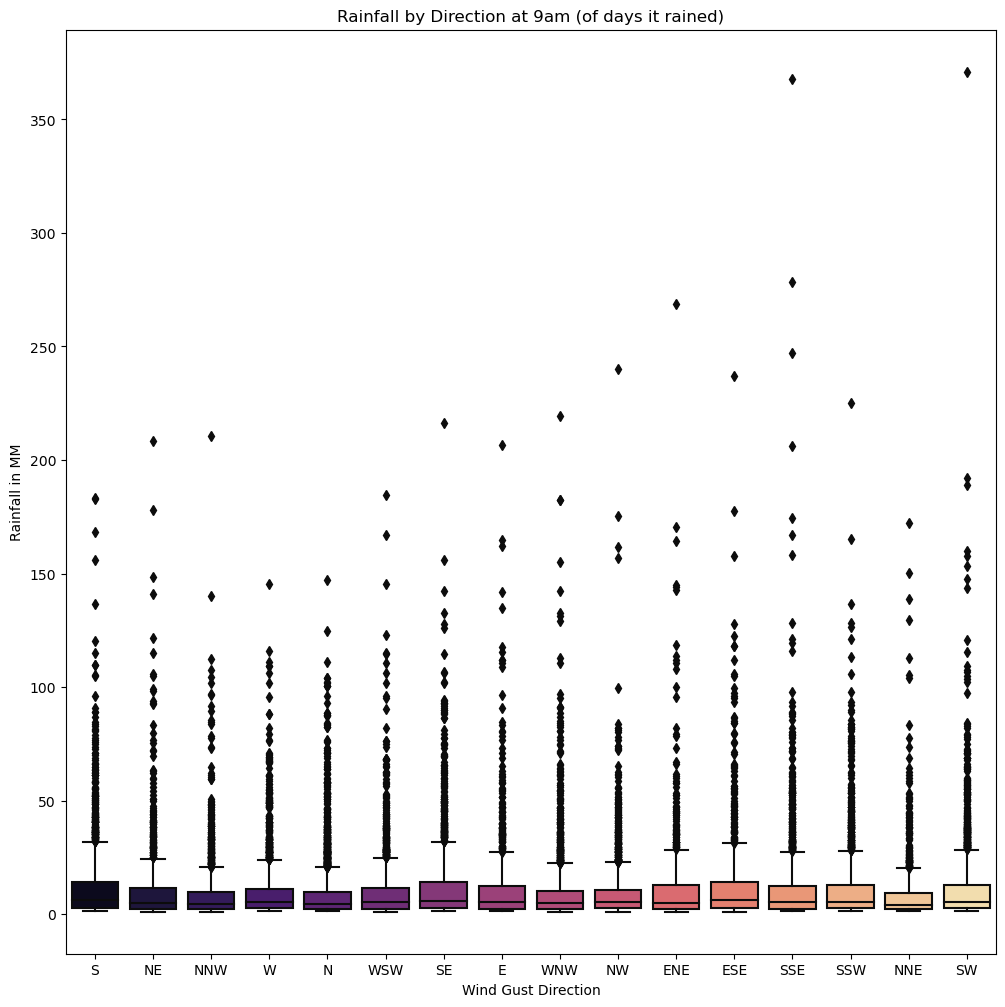

In [301]:
#Visualized the same data but at 9am and we can keep the same inferences
plt.figure(figsize = (12, 12))
sns.boxplot(data = df[df['RainToday'] == 1.0], x = 'WindDir9am', y = 'Rainfall', palette = 'magma')
plt.title('Rainfall by Direction at 9am (of days it rained)')
plt.ylabel('Rainfall in MM')
plt.xlabel('Wind Gust Direction')
plt.show()

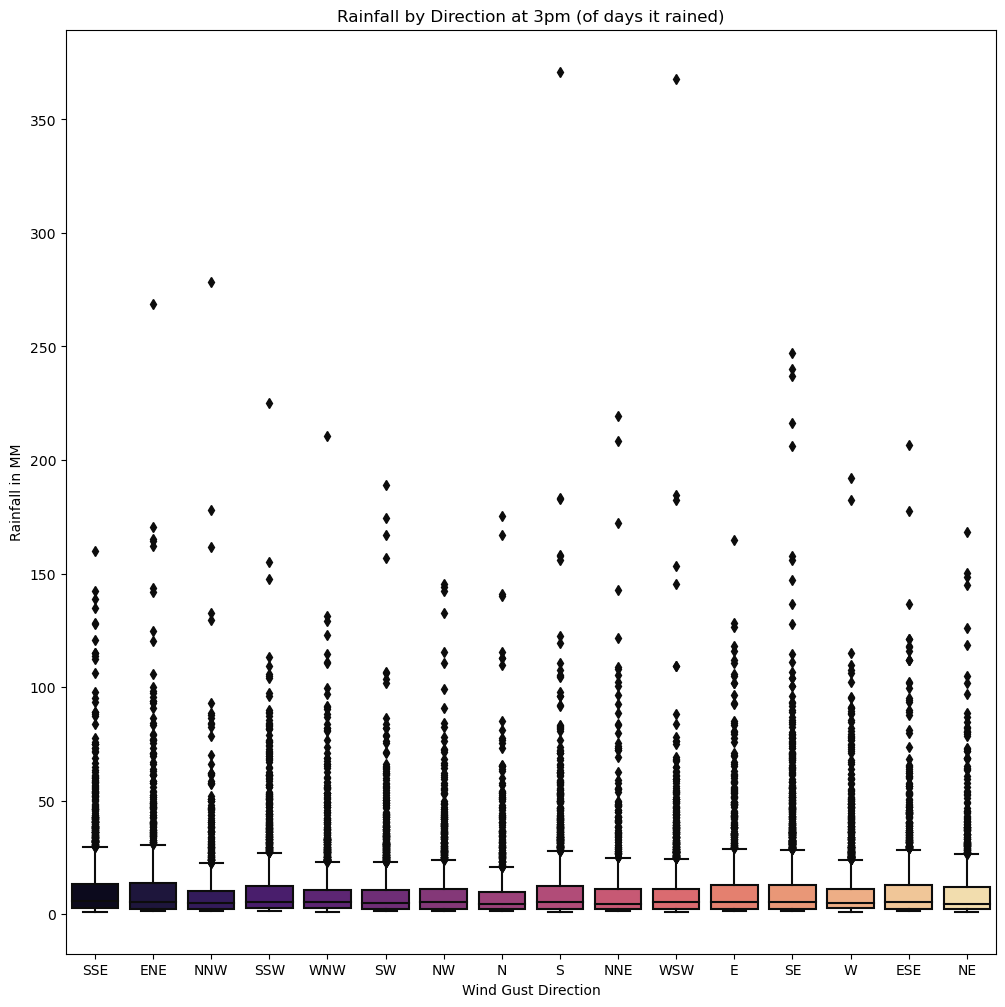

In [302]:
#Visualized the same data but at 3pm and we can keep the same inferences
plt.figure(figsize = (12, 12))
sns.boxplot(data = df[df['RainToday'] == 1.0], x = 'WindDir3pm', y = 'Rainfall', palette = 'magma')
plt.title('Rainfall by Direction at 3pm (of days it rained)')
plt.ylabel('Rainfall in MM')
plt.xlabel('Wind Gust Direction')
plt.show()

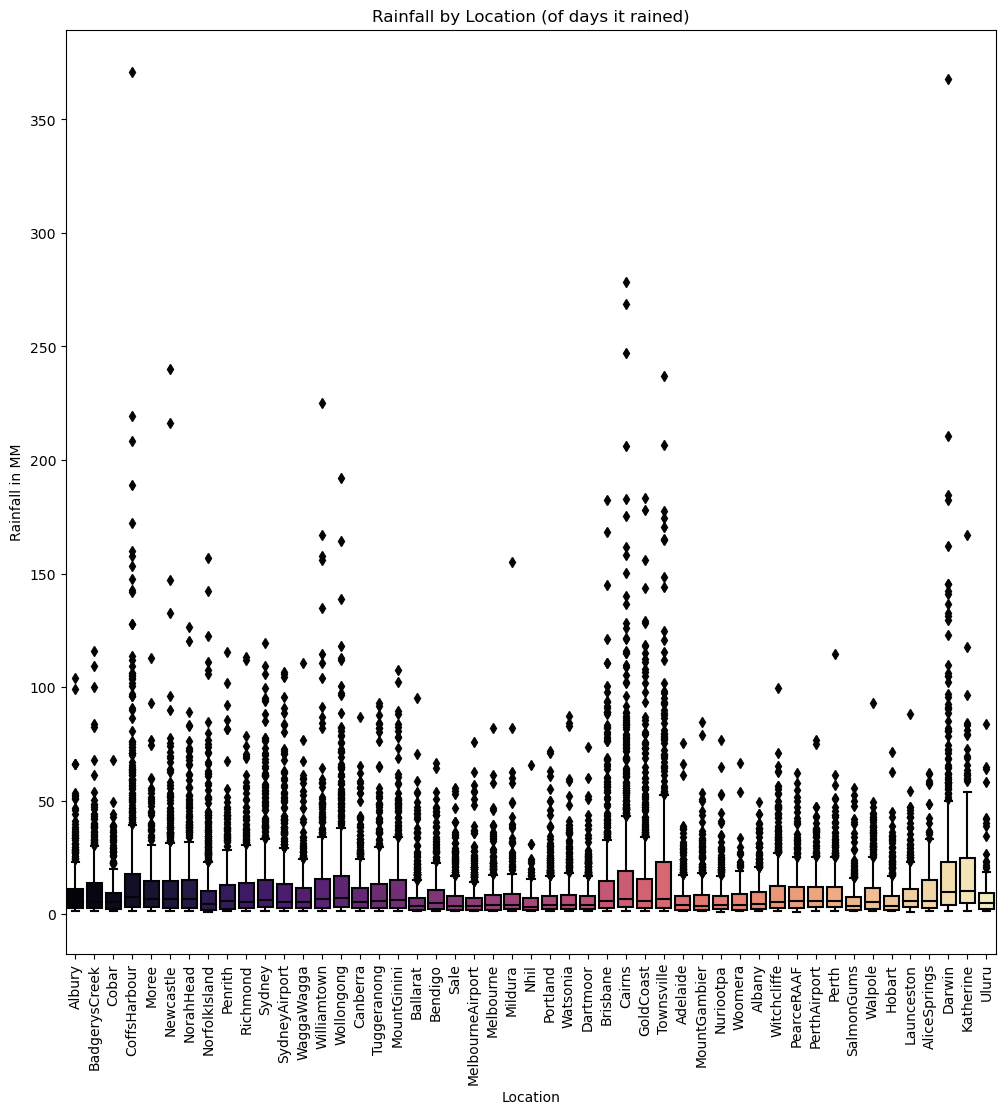

In [303]:
#Visualized the areas of AUS that get the most rainfall
#An Idea I'd like to implement here is graph a map that shows the areas of AUS that get the most rainfall
#I know choropleth has one but I don't think it's specific to AUS regions
plt.figure(figsize = (12, 12))
sns.boxplot(data = df[df['RainToday'] == 1.0], x = 'Location', y = 'Rainfall', palette = 'magma')
plt.title('Rainfall by Location (of days it rained)')
plt.ylabel('Rainfall in MM')
plt.xlabel('Location')
plt.xticks(rotation = 90)
plt.show()

In [304]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

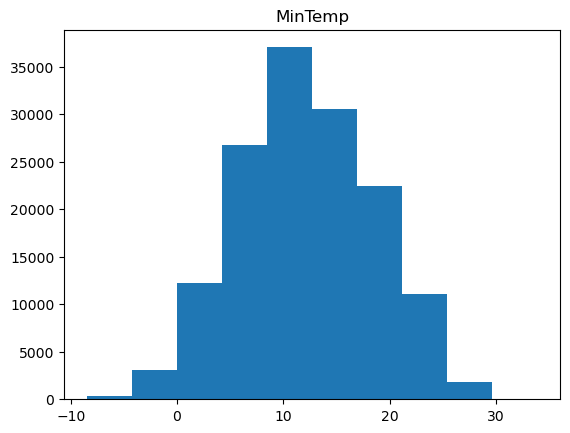

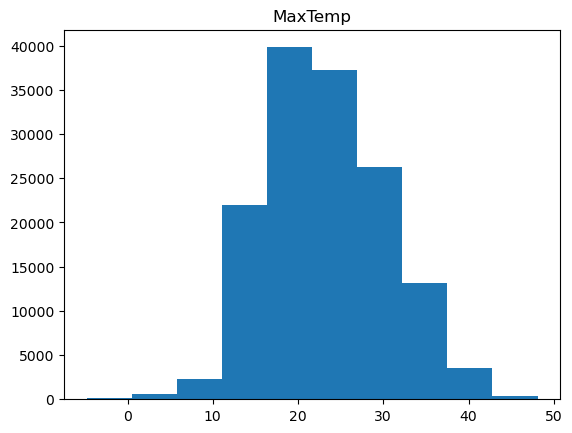

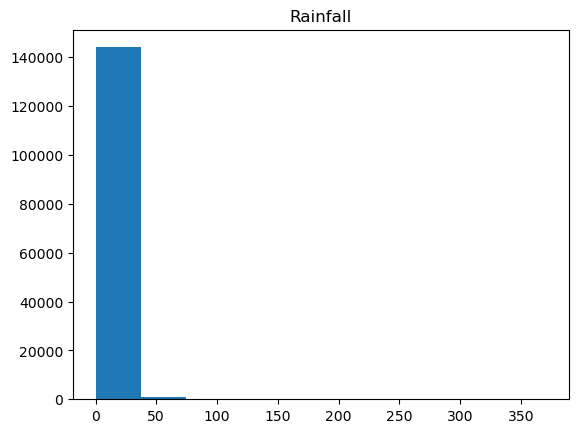

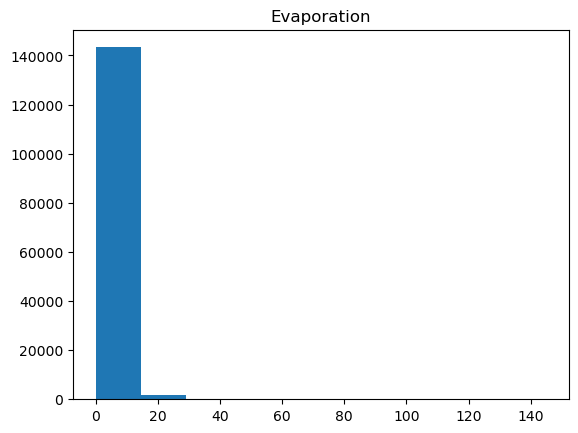

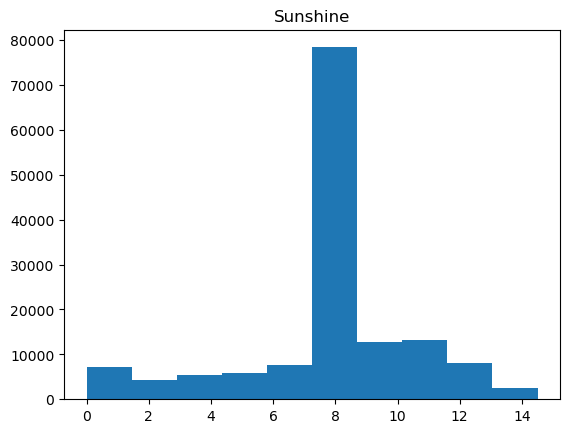

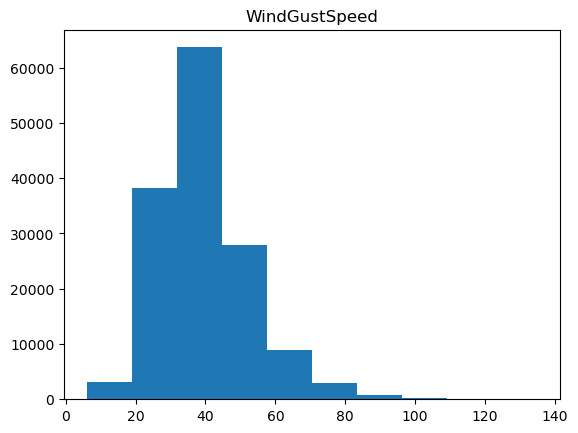

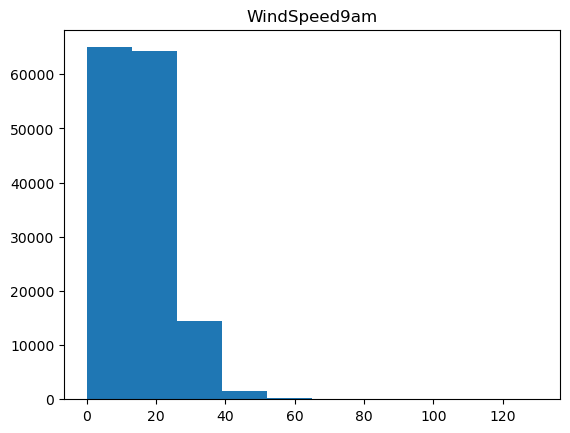

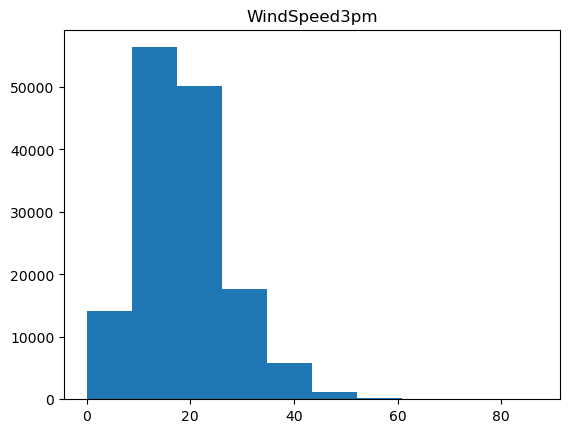

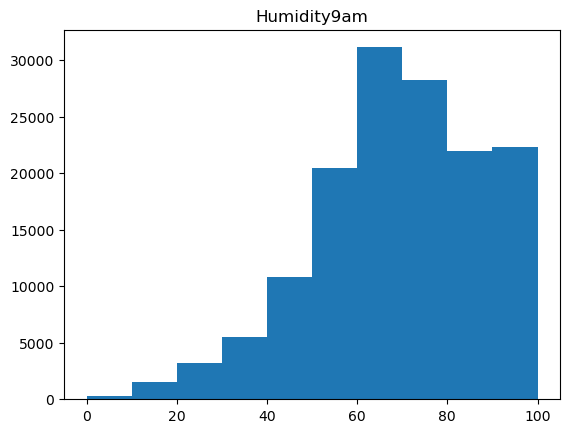

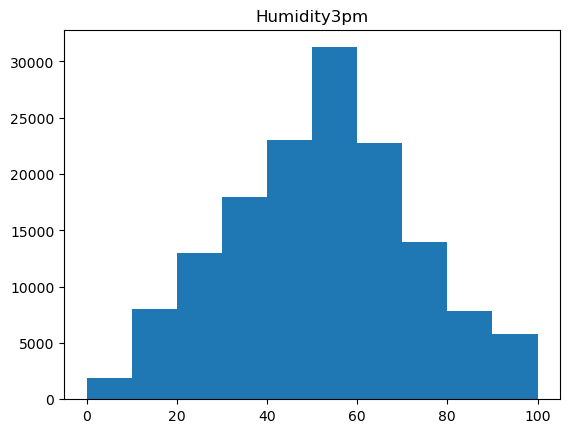

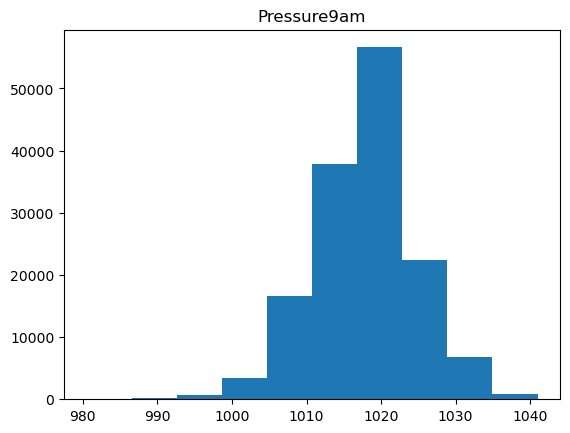

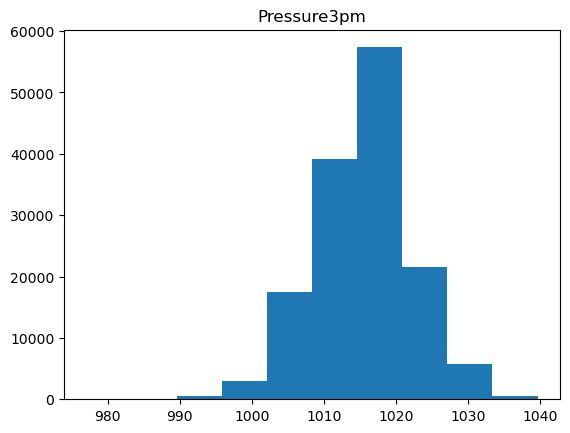

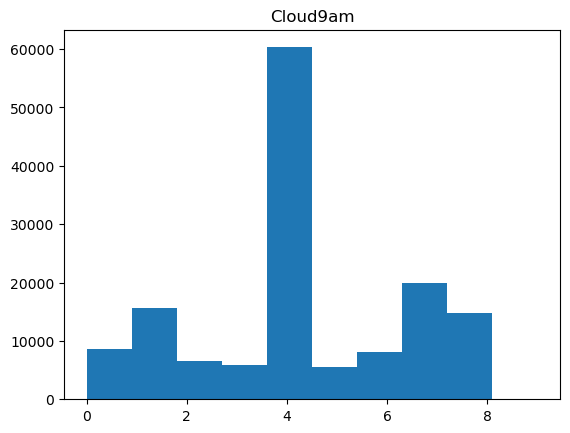

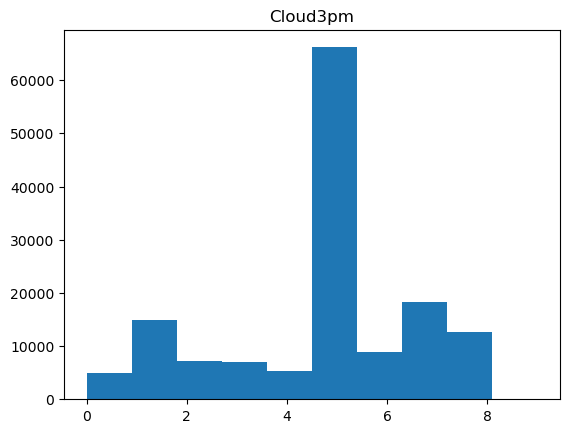

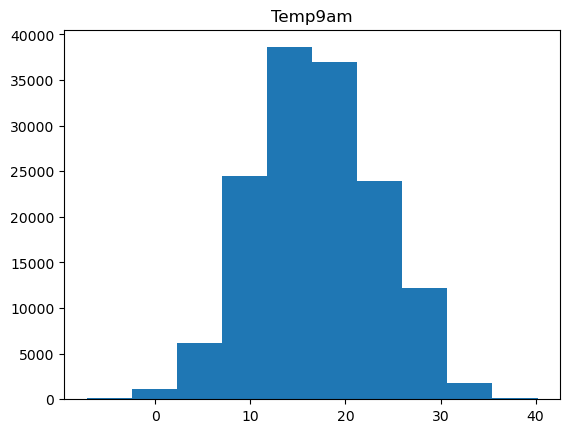

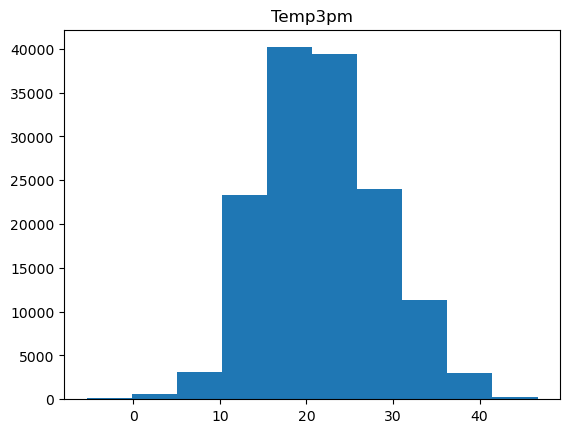

In [305]:
#Analyzing the distributions for numerical varibles
cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
for col in cols:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [306]:
#dropped the rest of the rows with NaN's
df = df.dropna()

In [307]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0.0,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0.0,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0.0,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0.0,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0.0,0.0


In [308]:
#imported classifier libraries
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

import warnings
warnings.filterwarnings('ignore')

In [309]:
#removed outliars
cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow']
def remove_outliers(df, cols):
    for col in cols:
        mean = df[col].mean()
        std = df[col].std()
        upper_limit = mean + 3*std
        lower_limit = mean - 3*std
        df = df[(df[col] < upper_limit) & (df[col] > lower_limit)]
    return df
        
df = remove_outliers(df, cols)

In [310]:
#looked at the relationships for RainTomorrow and every other numerical variable
#We A/B test the top 5-7 varibles vs. all the varibles and see which performs better
df.corr()['RainTomorrow'].sort_values(ascending=False)

RainTomorrow     1.000000
Humidity3pm      0.428441
Cloud3pm         0.291873
RainToday        0.284513
Rainfall         0.263673
Humidity9am      0.240878
Cloud9am         0.239461
WindGustSpeed    0.196764
MinTemp          0.085862
WindSpeed9am     0.065610
WindSpeed3pm     0.059040
Temp9am         -0.017274
Evaporation     -0.098951
MaxTemp         -0.147901
Temp3pm         -0.179220
Pressure3pm     -0.194834
Pressure9am     -0.212858
Sunshine        -0.315691
Name: RainTomorrow, dtype: float64

In [311]:
#represents all variables
X_full = df.drop(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainTomorrow'], axis = 1)
y_full = df['RainTomorrow']

In [312]:
#represents the most significant variables
X_slim = df.drop(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainTomorrow', 'Pressure9am', 'Pressure3pm', 'Temp3pm', 'MaxTemp', 'Evaporation', 'Temp9am', 'WindSpeed3pm', 'WindSpeed9am', 'MinTemp', 'WindGustSpeed', 'Cloud9am', 'Humidity9am'], axis = 1)
y_slim = df['RainTomorrow']

In [313]:
#just used the standard scaler for this instance but we could have used the Robust Scaler or Min Max Scaler
scaler1 = StandardScaler()
scaler.fit_transform(X_full)
scaler2 = StandardScaler()
scaler2.fit_transform(X_slim)

array([[-0.22378251, -0.01494648, -1.47657062,  0.01558922, -0.51005344],
       [-0.37980747, -0.01494648, -1.32573958,  0.01558922, -0.51005344],
       [-0.37980747, -0.01494648, -1.07435452, -1.17930608, -0.51005344],
       ...,
       [-0.37980747, -0.01494648, -1.52684764,  0.01558922, -0.51005344],
       [-0.37980747, -0.01494648, -1.3760166 ,  0.01558922, -0.51005344],
       [-0.37980747, -0.01494648, -1.3760166 , -1.17930608, -0.51005344]])

In [314]:
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size = 0.1, random_state = 42)
X_train_slim, X_test_slim, y_train_slim, y_test_slim = train_test_split(X_slim, y_slim, test_size = 0.1, random_state = 42)

In [315]:
logr = LogisticRegression()
model = logr.fit(X_train_full, y_train_full)
y_pred_full =  model.predict(X_test_full)

logr_conf_matrix = confusion_matrix(y_test_full, y_pred_full)
logr_acc_score = accuracy_score(y_test_full, y_pred_full)
print('Logistic Regression Accuracy: ', logr_acc_score*100, '%')
print("Logistic Regression Confusion Matrix: ", logr_conf_matrix)

Logistic Regression Accuracy:  84.60954117289577 %
Logistic Regression Confusion Matrix:  [[9931  494]
 [1532 1207]]


In [331]:
logr_slim = LogisticRegression()
model_slim = logr_slim.fit(X_train_slim, y_train_slim)
y_pred_slim =  model_slim.predict(X_test_slim)

logr_conf_matrix_slim = confusion_matrix(y_test_slim, y_pred_slim)
logr_acc_score_slim = accuracy_score(y_test_slim, y_pred_slim)
print('Logistic Regression Accuracy w/ reduced feaures: ', logr_acc_score_slim*100, '%')
print("Logistic Regression Confusion Matrix w/ reduced feaures: ", logr_conf_matrix_slim)

Logistic Regression Accuracy w/ reduced feaures:  83.59161349134003 %
Logistic Regression Confusion Matrix w/ reduced feaures:  [[9971  454]
 [1706 1033]]


In [318]:
xgb = XGBClassifier(objective='binary:logistic')
model2 = xgb.fit(X_train_full, y_train_full)
y_pred_full =  model2.predict(X_test_full)

xgb_conf_matrix = confusion_matrix(y_test_full, y_pred_full)
xgb_acc_score = accuracy_score(y_test_full, y_pred_full)
print('XGB Regression Accuracy: ', xgb_acc_score*100, '%')
print("XGB Regression Confusion Matrix: ", xgb_conf_matrix)

[17:38:00] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB Regression Accuracy:  85.88574901245822 %
XGB Regression Confusion Matrix:  [[9930  495]
 [1363 1376]]


In [330]:
xgb_slim = XGBClassifier(objective='binary:logistic')
model2_slim = xgb_slim.fit(X_train_slim, y_train_slim)
y_pred_slim =  model2_slim.predict(X_test_slim)

xgb_conf_matrix_slim = confusion_matrix(y_test_slim, y_pred_slim)
xgb_acc_score_slim = accuracy_score(y_test_slim, y_pred_slim)
print('XGB Regression Accuracy w/ reduced feaures: ', xgb_acc_score_slim*100, '%')
print("XGB Regression Confusion Matrix w/ reduced feaures: ", xgb_conf_matrix_slim)

[17:50:44] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB Regression Accuracy w/ reduced feaures:  83.87268307505317 %
XGB Regression Confusion Matrix w/ reduced feaures:  [[9978  447]
 [1676 1063]]


In [321]:
rf = RandomForestClassifier(n_estimators = 100)
model3 = rf.fit(X_train_full, y_train_full)
y_pred_full =  model3.predict(X_test_full)

rf_conf_matrix = confusion_matrix(y_test_full, y_pred_full)
rf_acc_score = accuracy_score(y_test_full, y_pred_full)
print('Random Forest Regression Accuracy: ', rf_acc_score*100, '%')
print("Random Forest Confusion Matrix: ", rf_conf_matrix)

Random Forest Regression Accuracy:  86.03767851716803 %
Random Forest Confusion Matrix:  [[10037   388]
 [ 1450  1289]]


In [329]:
rf_slim = RandomForestClassifier(n_estimators = 100)
model3_slim = rf_slim.fit(X_train_slim, y_train_slim)
y_pred_slim =  model3_slim.predict(X_test_slim)

rf_conf_matrix_slim = confusion_matrix(y_test_slim, y_pred_slim)
rf_acc_score_slim = accuracy_score(y_test_slim, y_pred_slim)
print('Random Forest Regression Accuracy w/ reduced feaures: ', rf_acc_score_slim*100, '%')
print("Random Forest Regression Confusion Matrix w/ reduced feaures: ", rf_conf_matrix_slim)

Random Forest Regression Accuracy w/ reduced feaures:  81.81403828623519 %
Random Forest Regression Confusion Matrix w/ reduced feaures:  [[9672  753]
 [1641 1098]]


In [325]:
dt = DecisionTreeClassifier()
model4 = dt.fit(X_train_full, y_train_full)
y_pred_full =  model4.predict(X_test_full)

dt_conf_matrix = confusion_matrix(y_test_full, y_pred_full)
dt_acc_score = accuracy_score(y_test_full, y_pred_full)
print('Decision Tree Regression Accuracy: ', dt_acc_score*100, '%')
print("Decision Tree Confusion Matrix: ", dt_conf_matrix)

Decision Tree Regression Accuracy:  78.87420237010028 %
Decision Tree Confusion Matrix:  [[8986 1439]
 [1342 1397]]


In [328]:
dt_slim = DecisionTreeClassifier()
model4_slim = dt_slim.fit(X_train_slim, y_train_slim)
y_pred_slim =  model4_slim.predict(X_test_slim)

dt_conf_matrix_slim = confusion_matrix(y_test_slim, y_pred_slim)
dt_acc_score_slim = accuracy_score(y_test_slim, y_pred_slim)
print('Decision Tree Regression Accuracy w/ reduced feaures: ', dt_acc_score_slim*100, '%')
print("Decision Tree Confusion Matrix w/ reduced feaures: ", dt_conf_matrix_slim)

Decision Tree Regression Accuracy w/ reduced feaures:  79.77058644788818 %
Decision Tree Confusion Matrix w/ reduced feaures:  [[9450  975]
 [1688 1051]]


In [342]:
acc_scores_df = pd.DataFrame({'Logistic Regression': [logr_acc_score, logr_acc_score_slim], 'XGBoosting': [xgb_acc_score, xgb_acc_score_slim], 'Random Forest': [rf_acc_score, rf_acc_score_slim], 'Decision Tree': [dt_acc_score, dt_acc_score_slim]})

acc_scores_df = acc_scores_df.T

acc_scores_df.columns = ['all features', 'top 5 features']

print("Accuracy Scores by Fet of Features:")
acc_scores_df.sort_values(by = 'all features', ascending = False)

Accuracy Scores by Fet of Features:


,all features,top 5 features
Random Forest,0.860377,0.818140
XGBoosting,0.858857,0.838727
Logistic Regression,0.846095,0.835916
Decision Tree,0.788742,0.797706


We can conclude that using all the features performed better that using only the top 5 features and Random Forest was the best at predicting if it would rain tomorrow.